<a href="https://colab.research.google.com/github/polinakochneva1/me_labs_house/blob/main/laba_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

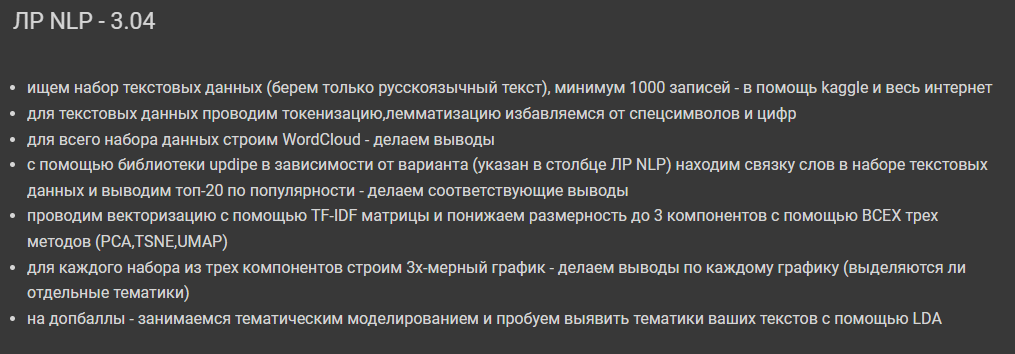

In [34]:
import pandas as pd

In [50]:
df = pd.read_excel('/content/text.xlsx')
df.head()

,id,text
0,0,Друзья познаются в беде.
1,1,"Не имей сто рублей, а имей сто друзей."
2,2,"Скажи мне кто твой друг, и я скажу, кто ты."
3,3,"С кем поведешься, от того и наберешься."
4,4,Одинокое дерево ветер легче валит.


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1143 non-null   object
dtypes: object(1)
memory usage: 9.1+ KB


Предобработка данных

In [37]:
!pip install pymorphy2

In [38]:
import numpy as np
import re
import nltk
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pymorphy2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
text=df['text'] #берем столбец с текстом
norm_text=[]
# 1 - только буквы
# 2 - перевод в нижний регистр
# 3 - привести все слова в единую форму
morph=pymorphy2.MorphAnalyzer()
for s in tqdm(text):
    s1 = re.sub(r'[^\w\s]+|[\d]+', r'',s).strip()
    s1 = s1.lower()
    s1 = word_tokenize(s1) #токенизация
    words=[]
    for i in s1:
        pv = morph.parse(i)
        words.append(pv[0].normal_form)
    sentence=' '.join(words)
    norm_text.append(sentence)

100%|██████████| 1143/1143 [00:03<00:00, 365.68it/s]


In [62]:
text[1]#результат

'Не имей сто рублей, а имей сто друзей.'

In [63]:
norm_text[1]#результат

'не иметь сто рубль а иметь сто друг'

WordCloud

In [64]:
df['norm_text']=norm_text

In [65]:
cat23 = df[df['id']==23]['norm_text'].values
cat23 = ' '.join(cat23)
cat23

'не хвалиться друг в три день а хвалиться в три год'

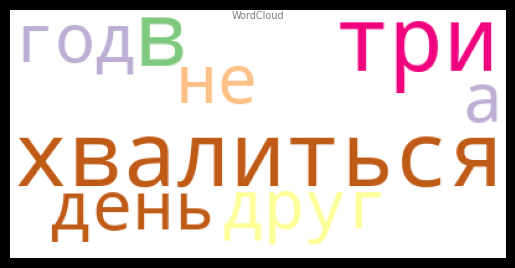

In [73]:
fig = plt.figure()
fig.patch.set_facecolor('black')
plt.subplots_adjust(wspace=0.3, hspace=0.2)

wordcloud = WordCloud(colormap='Accent', background_color='white', contour_width=10).generate(cat23)
plt.tick_params(labelsize=10)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('WordCloud',fontdict={'fontsize':7,'color':'grey'},y=0.93)
plt.tick_params(labelsize=10)

UDPipe

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1143 non-null   int64 
 1   text       1143 non-null   object
 2   norm_text  1143 non-null   object
dtypes: int64(1), object(2)
memory usage: 26.9+ KB


In [82]:
df['text'].values[:10]

array(['Друзья познаются в беде.',
       'Не имей сто рублей, а имей сто друзей.',
       'Скажи мне кто твой друг, и я скажу, кто ты.',
       'С кем поведешься, от того и наберешься.',
       'Одинокое дерево ветер легче валит.',
       'Старый друг, лучше новых двух.', 'Дружбу за деньги не купишь.',
       'Кто любит лгать, того нельзя в друзья брать.',
       'С иным водиться — что в крапиву садиться.',
       'Связанного веника не переломишь, а по прутику весь веник переломаешь.'],
      dtype=object)

In [75]:
!pip install ufal.udpipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.8/936.8 kB 9.5 MB/s eta 0:00:00


In [93]:
# Подключаем синтаксической анализатор и его части.
import ufal.udpipe
from ufal.udpipe import Model, Pipeline, ProcessingError

# Для отрисовки деревьев нам потребуются вот эти библиотеки.

from collections import defaultdict
from tqdm.auto import tqdm
import random
from nltk.tokenize import RegexpTokenizer

In [77]:
#загружаем модель
model = Model.load("/content/text.xlsx")

In [96]:
# Токенизатор со снятием омонимии.
tokenizer = model.newTokenizer(model.DEFAULT)
# Объект для отображения результатов разбора.
conlluOutput = ufal.udpipe.OutputFormat.newOutputFormat("conllu")
# Объект предложения, в которое будет осуществляться разбор.
sentence = ufal.udpipe.Sentence()
# Объект для ошибок, возникающих в ходе разбора.
error = ufal.udpipe.ProcessingError()

AttributeError: 'NoneType' object has no attribute 'newTokenizer'

In [90]:
df['text'][5]

'Старый друг, лучше новых двух.'

In [91]:
#кормим токенизатору наш текст
tokenizer.setText(df['text'][5])

NameError: name 'tokenizer' is not defined